In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
print(boston['data'])

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [9]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [15]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [17]:
X = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
y = df['AGE']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=101)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
ln = LinearRegression()
ln.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
print(ln.intercept_)

-49.15226618300299


In [24]:
ln.coef_

array([-1.39543811e-04, -1.26214756e-01, -1.12264055e-01,  6.32075956e+00,
        9.32648513e+01,  6.72083766e+00, -4.10099222e+00, -3.06556580e-01,
       -1.58741571e-03,  1.41493863e+00,  1.45507927e-02,  1.19148775e+00])

In [25]:
cdf = pd.DataFrame(ln.coef_,X.columns,columns=['Coeff'])

In [26]:
cdf

,Coeff
CRIM,-0.000140
ZN,-0.126215
INDUS,-0.112264
CHAS,6.320760
NOX,93.264851
RM,6.720838
DIS,-4.100992
RAD,-0.306557
TAX,-0.001587
PTRATIO,1.414939


In [27]:
predictions = ln.predict(X_test)
predictions

array([ 37.83840597,  53.80419793,  87.62768625,  89.7129394 ,
        38.61949168,  60.11863867,  76.68163897,  88.13701423,
        73.42286095, 101.6075419 ,  25.01077216,  98.29232028,
        67.34342949,  16.04464275,  74.286381  ,  82.14758893,
        94.79151319,  38.94935802,  59.76783582,  59.93584379,
       101.39989747,  58.36316995,  77.34076575,  32.02029345,
        41.15227449,  95.40391338,  70.49842886,  94.56513224,
        88.09824608,  27.45945135,  36.5726197 ,  70.15987607,
        30.44419725,  40.32991806,  86.26591701,  62.05635029,
        91.68698206,  72.81635792, 111.9566149 ,  65.02085719,
        63.36391161,  17.01801039,  64.64674083,  94.02331604,
        77.90209266,  70.97576358,  66.34404956,  96.93085721,
        48.78539343,  37.58207988,  62.86962038, 104.92712455,
        74.68430036,  69.63585222,  56.42074199, 105.4452751 ,
        75.94568289,  83.96030761,  75.07467282, 100.88729752,
        26.23481537, 109.26730488,  66.90820677,  26.49

In [28]:
y_test

195    32.0
4      54.2
434    95.0
458    83.7
39     21.8
       ... 
78     53.7
160    92.6
124    95.8
167    79.2
272    58.7
Name: AGE, Length: 203, dtype: float64

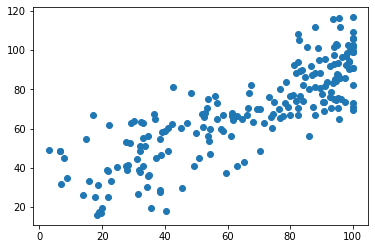

In [30]:
plt.scatter(y_test,predictions)

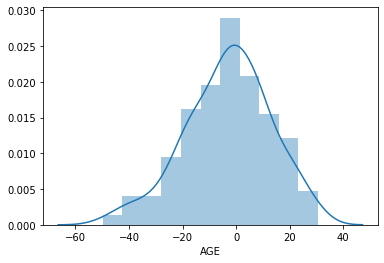

In [32]:
sns.distplot(y_test-predictions)